In [30]:
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

# Step 1: Import Object

In [4]:
from keff import kEffCorrection
import numpy as np
import uncertainties as unc

# Step 2: Create kEffCorrection object for desired roadset, target

* Requires:
   * Roadset
   * Target Position
* Options [defaults]:
   * Kinematic bins [Standard xT bins]
   * Chamber_intensity bins [binned from 0 to 70000 in 7 bins]
   * Mass range [4.2 < mass < 10]
   * Server, schema, etc.

In [36]:
%%time
c = kEffCorrection(roadset=67, targetPos=3, mass_range=(4.2, 10), kin=[], kin_bins=[],
                    intensity=[5000*i for i in range(0,21)])

CPU times: user 16 s, sys: 482 ms, total: 16.4 s
Wall time: 19.6 s


In [41]:
cxf = kEffCorrection(roadset=67, targetPos=3, mass_range=(4.2, 10), kin=['xF'], kin_bins=[3],
                    intensity=[5000*i for i in range(0,21)])

In [42]:
cx1 = kEffCorrection(roadset=67, targetPos=3, mass_range=(4.2, 10), kin=['xB'], kin_bins=[3],
                    intensity=[5000*i for i in range(0,21)])

In [43]:
cx2 = kEffCorrection(roadset=67, targetPos=3, mass_range=(4.2, 10), kin=['xT'], kin_bins=[3],
                    intensity=[5000*i for i in range(0,21)])

In [44]:
cm = kEffCorrection(roadset=67, targetPos=3, mass_range=(4.2, 10), kin=['mass'], kin_bins=[3],
                    intensity=[5000*i for i in range(0,21)])

In [45]:
cpt = kEffCorrection(roadset=67, targetPos=3, mass_range=(4.2, 10), kin=['dpt'], kin_bins=[3],
                    intensity=[5000*i for i in range(0,21)])

In [46]:
cth = kEffCorrection(roadset=67, targetPos=3, mass_range=(4.2, 10), kin=['theta'], kin_bins=[3],
                    intensity=[5000*i for i in range(0,21)])

In [47]:
cphi = kEffCorrection(roadset=67, targetPos=3, mass_range=(4.2, 10), kin=['phi'], kin_bins=[3],
                    intensity=[5000*i for i in range(0,21)])

In [29]:
c.eff_df.head()

,raw_clean,weighted_clean,raw_messy,weighted_messy,efficiency,uncertainty,ssqw_clean,ssqw_messy,weighted_other,ssqw_other,raw_efficiency,wilson_x,upper_interval,lower_interval,mean_intensity,w_mean_intensity
chamber_intensity,,,,,,,,,,,,,,,,
"[0, 5000)",45534,2.077146e+06,43205,1.960574e+06,0.943879,0.003237,8.530192e+08,8.010628e+08,116572.057523,5.195633e+07,0.948851,0.000198,0.947028,0.940554,2752.184387,2753.458352
"[5000, 10000)",43539,1.971265e+06,38645,1.731193e+06,0.878214,0.004769,8.264049e+08,7.154537e+08,240072.256252,1.109512e+08,0.887595,0.000213,0.882903,0.873364,7374.561187,7376.173338
"[10000, 15000)",34038,1.525382e+06,27960,1.217798e+06,0.798356,0.006429,5.974945e+08,4.674131e+08,307583.887359,1.300815e+08,0.821435,0.000257,0.804709,0.791850,12403.962009,12376.156092
"[15000, 20000)",26330,1.194613e+06,20063,8.937020e+05,0.748110,0.008076,4.940769e+08,3.519026e+08,300911.317955,1.421743e+08,0.761983,0.000346,0.756100,0.739948,17405.784792,17383.544992
"[20000, 25000)",20559,9.487998e+05,14388,6.495931e+05,0.684647,0.009636,3.872975e+08,2.564686e+08,299206.688933,1.308289e+08,0.699839,0.000430,0.694204,0.674932,22404.315375,22404.101611


In [ ]:
c3 = kEffCorrection(roadset=67, targetPos=3, mass_range=(4.2, 10),
                    intensity=[5000*i for i in range(0,21)])

In [23]:
c1.exp_df

,p0,p0_unc,chisq_pdf
xT,,,
"[0.08, 0.14)",0.000014,5.288888e-07,1.062135
"[0.14, 0.16)",0.000015,9.388026e-07,2.230593
"[0.16, 0.18)",0.000015,8.809832e-07,2.253973
"[0.18, 0.21)",0.000017,5.566889e-07,1.097409
"[0.21, 0.25)",0.000018,6.765792e-07,2.058980
"[0.25, 0.31)",0.000020,4.357174e-07,0.947687
"[0.31, 0.53)",0.000024,4.828040e-07,1.320234


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
sns.set_context('notebook', font_scale=1.8)
sns.set_style('whitegrid')

In [32]:
def lin_func(x, b, m):
    return b + m * x

In [33]:
def exp_func(x, c):
    return np.exp(-c*x)

In [34]:
def get_confidence(x, y, p0):
    # predict y values of origional data using the fit
    p_y = exp_func(x, p0)

    # calculate the y-error (residuals)
    y_err = y - p_y

    # create series of new test x-values to predict for
    p_x = np.arange(0,np.max(x)+3000,100)

    # now calculate confidence intervals for new test x-series
    mean_x = np.mean(x)                 # mean of x
    n = len(x)                          # number of samples in origional fit
    t = stats.t.ppf(1-0.025, n)         # appropriate t value (with n, two tailed 95%)
    s_err = np.sum(np.power(y_err,2))   # sum of the squares of the residuals

    confs = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((p_x-mean_x),2)/
                ((np.sum(np.power(x,2)))-n*(np.power(mean_x,2))))))

    # now predict y based on test x-values
    p_y = exp_func(p_x, p0)

    # get lower and upper confidence limits based on predicted y and confidence intervals
    lower = p_y - abs(confs)
    upper = p_y + abs(confs)

    return p_x, lower, upper

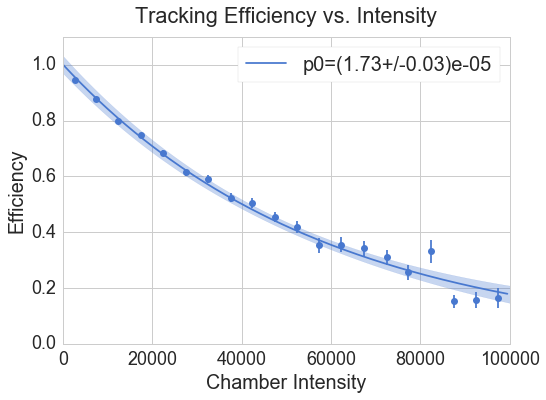

In [37]:
n = len(c.exp_df)
pal = sns.color_palette("muted", n)
i = 0

for index, row in c.exp_df.iterrows():
    eff = c.eff_df.efficiency.values
    un = c.eff_df.uncertainty.values
    intensity = c.eff_df.w_mean_intensity.values
    min_int = 0
    max_int = max(c.intensity)
    
    p = unc.ufloat(row.p0, row.p0_unc)
    x = np.arange(min_int, max_int, 500)
    ax = plt.errorbar(intensity, eff, yerr=un, fmt='o', color=pal[i])
    plt.plot(x, exp_func(x, row.p0),
             #label=(r'$x_2\in$ %s: p0=%.2g' % (index, row.p0)),
             label=(r'''p0={:.1ue}'''.format(p)),
             color=pal[i])
    #         color=pal[4])
    plt.fill_between(*get_confidence(intensity, eff, row.p0), alpha=0.3, color=pal[i])
                     #color=pal[3], alpha=0.3, label='95% confidence')
    i += 1
    
plt.xlim([0,100000])
plt.ylim([0,1.1])
plt.legend(loc='best', frameon=True, fontsize=20)
plt.title(r'Tracking Efficiency vs. Intensity', y=1.03)
plt.ylabel('Efficiency')
plt.xlabel('Chamber Intensity')
plt.savefig('all_keff_int.png')
plt.show()

In [39]:
def plot_kin_eff(c1, kin, filename):
    n = len(c1.exp_df)
    pal = sns.color_palette("deep", n)
    
    i = 0

    for index, row in c1.exp_df.iterrows():
        eff = c1.eff_df.ix[[index],:].efficiency.values
        un = c1.eff_df.ix[[index],:].uncertainty.values
        intensity = c1.eff_df.ix[[index],:].w_mean_intensity.values
        min_int = 0
        max_int = max(c1.intensity)

        p = unc.ufloat(row.p0, row.p0_unc)
        x = np.arange(min_int, max_int, 500)
        ax = plt.errorbar(intensity, eff, yerr=un, fmt='o', color=pal[i], capsize=12)
        plt.plot(x, exp_func(x, row.p0),
                 label=(r'${}\in${}: p0={:.1ue}'.format(kin, index, p)),
                 color=pal[i])
        plt.fill_between(*get_confidence(intensity, eff, row.p0), alpha=0.25, color=pal[i])
        i += 1
    
    plt.ylim([0,1.1])
    plt.xlim([0,100000])
    plt.legend(loc='best', frameon=True, fontsize=13)
    plt.title(r'$%s$' % kin, y=1.03)
    plt.ylabel('Efficiency')
    plt.xlabel('Chamber Intensity')
    plt.savefig(filename+'.png')
    plt.show()

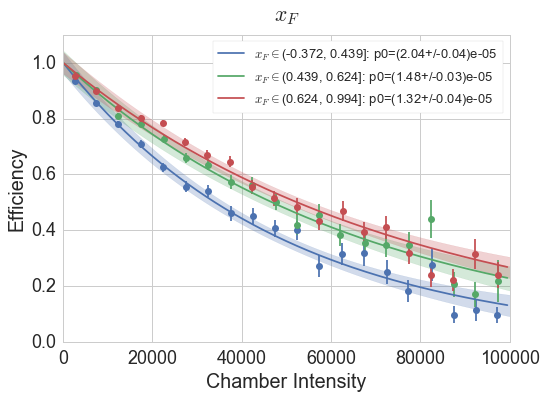

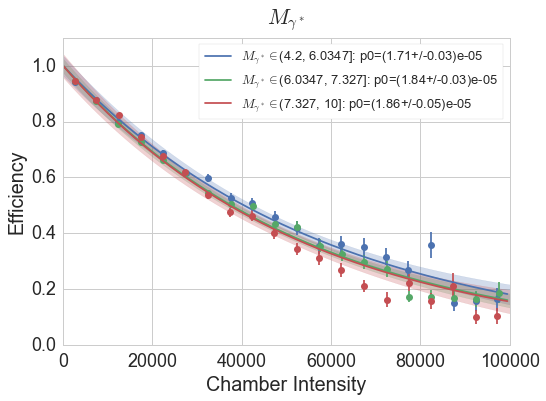

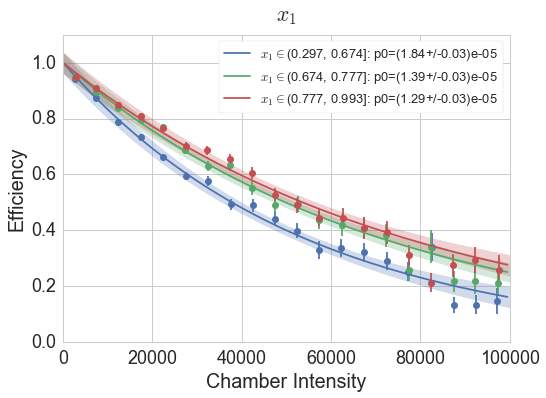

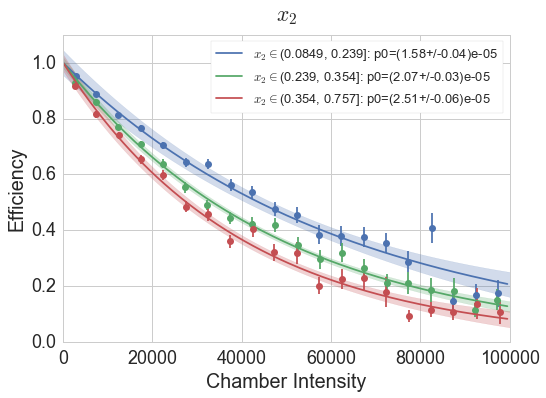

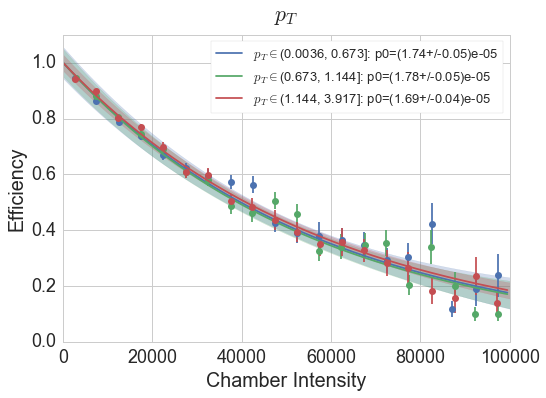

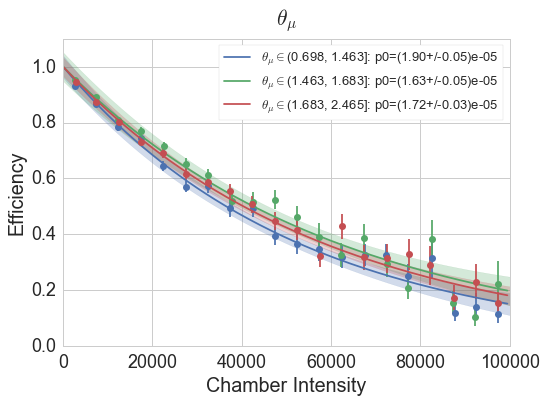

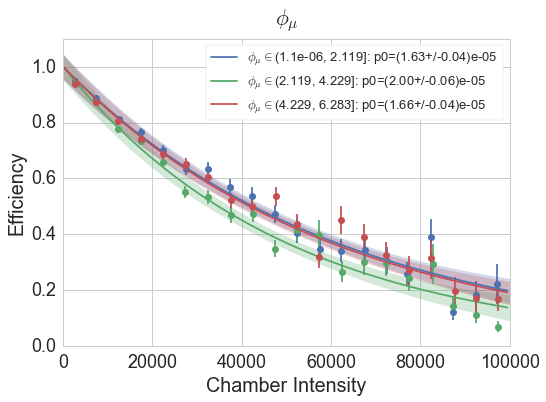

In [48]:
plot_kin_eff(cxf, r'x_F', 'xF_keff_int')
plot_kin_eff(cm, r'M_{\gamma^*}', 'mass_keff_int')
plot_kin_eff(cx1, r'x_1', 'x1_keff_int')
plot_kin_eff(cx2, r'x_2', 'x2_keff_int')
plot_kin_eff(cpt, r'p_T', 'pT_keff_int')
plot_kin_eff(cth, r'\theta_\mu', 'theta_keff_int')
plot_kin_eff(cphi, r'\phi_\mu', 'phi_keff_int')

## Now, apply kEff to **Messy** data in $x_F$

In [49]:
import pandas as pd

In [53]:
cxf2 = kEffCorrection(roadset=67, targetPos=3, mass_range=(4.2, 10), kin=['xF'], kin_bins=[4],
                      intensity=[10000*i for i in range(0,11)])

In [54]:
cxf2.exp_df

,p0,p0_unc,chisq_pdf
xF,,,
"(-0.372, 0.379]",0.000022,4.208229e-07,1.040997
"(0.379, 0.537]",0.000016,2.855535e-07,0.883334
"(0.537, 0.668]",0.000014,3.790821e-07,2.098631
"(0.668, 0.994]",0.000013,3.204557e-07,2.246088


In [55]:
kfactors = cxf2.kEff(cxf2.messy_df[['xF', 'chamber_intensity']], inv=True)

In [56]:
cxf2.messy_df.gmcWeight = cxf2.messy_df.gmcWeight*kfactors

In [57]:
cxf2.messy_df.gmcWeight_sq = np.square(cxf2.messy_df.gmcWeight)

In [58]:
def plot_new_eff(c1, kin, kinlabel, filename):
    c1.kin=[kin]
    c1.kin_bins = [3]
    eff_df = c1.calc_eff().copy()
    
    n = len(c1.exp_df)
    pal = sns.color_palette("deep", n)
    
    i = 0

    for i in range(0,3):
        index = eff_df.index.levels[0][i]
        eff = eff_df.ix[[index],:].efficiency.values
        un = eff_df.ix[[index],:].uncertainty.values
        intensity = eff_df.ix[[index],:].w_mean_intensity.values
        min_int = 0
        max_int = max(c1.intensity)

        ax = plt.errorbar(intensity, eff, yerr=un, fmt='o', color=pal[i],
                          label=(r'${}\in${}'.format(kinlabel, index)))
        plt.axhline(1.0,0,100000, c='k')
        plt.axvline(60000,0,1.4, c='r')
        i += 1
    
    plt.ylim([0,1.4])
    plt.xlim([0,100000])
    plt.legend(loc='best', frameon=True, fontsize=17)
    plt.title(r'$%s$' % kinlabel, y=1.03)
    plt.ylabel('Efficiency')
    plt.xlabel('Chamber Intensity')
    plt.savefig(filename+'.png')
    plt.show()

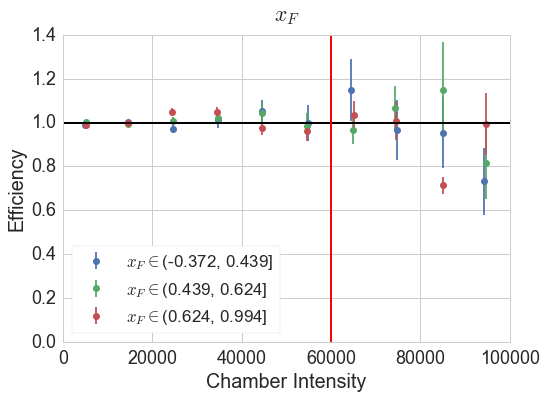

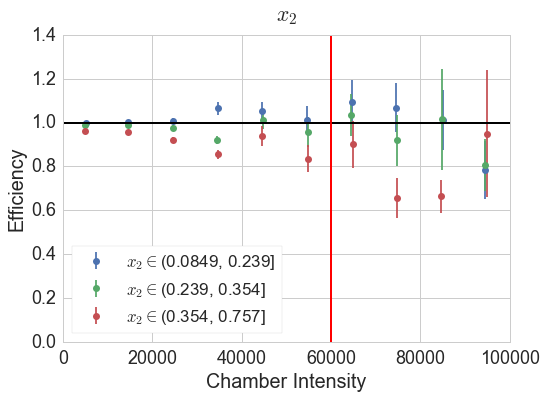

In [59]:
plot_new_eff(cxf2, 'xF', r'x_F', 'xF_keff_corrected_int')
#plot_new_eff(cxf2, 'mass', r'M_{\gamma^*}')
#plot_new_eff(cxf2, 'xB', r'x_1')
plot_new_eff(cxf2, 'xT', r'x_2', 'x2_keff_corrected_int')
#plot_new_eff(cxf2, 'dpt', r'p_T')
#plot_new_eff(cxf2, 'theta', r'\theta_\mu')
#plot_new_eff(cxf2, 'phi', r'\phi_\mu')

In [60]:
%%time
c1 = kEffCorrection(roadset=67, targetPos=1, mass_range=(4.2, 10), kin=[], kin_bins=[],
                    intensity=[5000*i for i in range(0,21)])
c3 = kEffCorrection(roadset=67, targetPos=3, mass_range=(4.2, 10), kin=[], kin_bins=[],
                    intensity=[5000*i for i in range(0,21)])
c5 = kEffCorrection(roadset=67, targetPos=5, mass_range=(4.2, 10), kin=[], kin_bins=[],
                    intensity=[5000*i for i in range(0,21)])
c6 = kEffCorrection(roadset=67, targetPos=6, mass_range=(4.2, 10), kin=[], kin_bins=[],
                    intensity=[5000*i for i in range(0,21)])
c7 = kEffCorrection(roadset=67, targetPos=7, mass_range=(4.2, 10), kin=[], kin_bins=[],
                    intensity=[5000*i for i in range(0,21)])

CPU times: user 1min 12s, sys: 2.15 s, total: 1min 14s
Wall time: 1min 21s


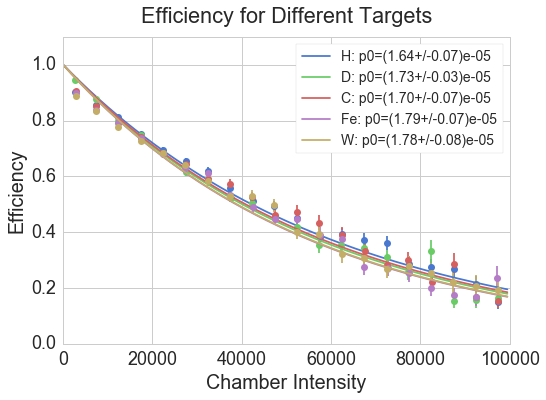

In [61]:
n = 5
pal = sns.color_palette("muted", n)
i = 0

for target, corr in zip(['H', 'D', 'C', 'Fe', 'W'], [c1, c3, c6, c5, c7]):

    for index, row in corr.exp_df.iterrows():
        eff = corr.eff_df.efficiency.values
        un = corr.eff_df.uncertainty.values
        intensity = corr.eff_df.w_mean_intensity.values
        min_int = 0
        max_int = max(corr.intensity)

        p = unc.ufloat(row.p0, row.p0_unc)
        x = np.arange(min_int, max_int, 500)
        ax = plt.errorbar(intensity, eff, yerr=un, fmt='o', color=pal[i])
        plt.plot(x, exp_func(x, row.p0),
                 label=(r'{}: p0={:.1ue}'.format(target, p)),
                 color=pal[i])
        i += 1

plt.ylim([0,1.1])
plt.xlim([0,100000])
plt.legend(loc='best', frameon=True, fontsize=14)
plt.title('Efficiency for Different Targets', y=1.03)
plt.ylabel('Efficiency')
plt.xlabel('Chamber Intensity')
plt.savefig('target-keff-int.png')
plt.show()

# Compare For Different Roadsets

In [62]:
c3_62 = kEffCorrection(roadset=62, schema='user_evan_recon_rate_dep', targetPos=3, mass_range=(4.2, 10), kin=[], kin_bins=[],
                    intensity=[5000*i for i in range(0,21)])
c3_67 = kEffCorrection(roadset=67, schema='user_evan_recon_rate_dep', targetPos=3, mass_range=(4.2, 10), kin=[], kin_bins=[],
                    intensity=[5000*i for i in range(0,21)])

In [29]:
print sns.color_palette("muted", 4)

[(0.2823529411764706, 0.47058823529411764, 0.8117647058823529), (0.41568627450980394, 0.8, 0.396078431372549), (0.8392156862745098, 0.37254901960784315, 0.37254901960784315), (0.7058823529411765, 0.48627450980392156, 0.7803921568627451)]


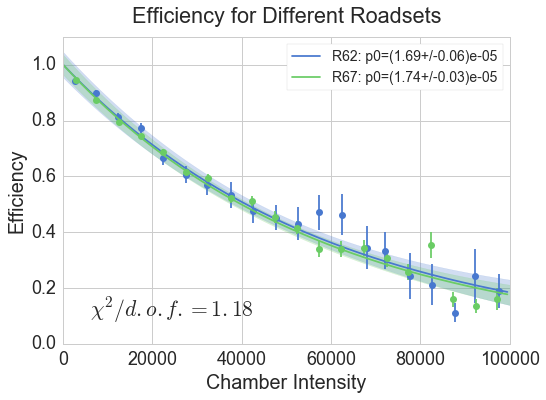

In [63]:
n = 2
pal = sns.color_palette("muted", n)
i = 0

for index, row in c3_62.exp_df.iterrows():

    eff = c3_62.eff_df.efficiency.values
    un = c3_62.eff_df.uncertainty.values
    intensity = c3_62.eff_df.w_mean_intensity.values
    min_int = 0
    max_int = max(c3_62.intensity)

    p = unc.ufloat(row.p0, row.p0_unc)
    x = np.arange(min_int, max_int, 500)
    ax = plt.errorbar(intensity, eff, yerr=un, fmt='o', color=pal[i])
    plt.plot(x, exp_func(x, row.p0),
             label=(r'R62: p0={:.1ue}'.format(p)),
             color=pal[i])
    plt.fill_between(*get_confidence(intensity, eff, row.p0), alpha=0.25, color=pal[i])
    i += 1

for index, row in c3_67.exp_df.iterrows():

    eff = c3_67.eff_df.efficiency.values
    un = c3_67.eff_df.uncertainty.values
    intensity = c3_67.eff_df.w_mean_intensity.values
    min_int = 0
    max_int = max(c3_67.intensity)

    p = unc.ufloat(row.p0, row.p0_unc)
    x = np.arange(min_int, max_int, 500)
    ax = plt.errorbar(intensity, eff, yerr=un, fmt='o', color=pal[i])
    plt.plot(x, exp_func(x, row.p0),
             label=(r'R67: p0={:.1ue}'.format(p)),
             color=pal[i])
    plt.fill_between(*get_confidence(intensity, eff, row.p0), alpha=0.25, color=pal[i])
    i += 1
    
plt.ylim([0,1.1])
plt.xlim([0,100000])
plt.text(6000,0.1, r'$\chi^2/d.o.f. = 1.18$')
plt.legend(loc='best', frameon=True, fontsize=14)
plt.title('Efficiency for Different Roadsets', y=1.03)
plt.ylabel('Efficiency')
plt.xlabel('Chamber Intensity')
plt.savefig('roadset-keff-int.png')
plt.show()

In [15]:
(c3_62.eff_df.efficiency.values - c3_67.eff_df.efficiency.values).sum()/(c3_67.eff_df.efficiency.values).sum()

0.022981999885867684

In [21]:
from uncertainties import unumpy as unp
import uncertainties as unc

In [20]:
a1 = unp.uarray(c3_67.eff_df.efficiency, c3_67.eff_df.uncertainty)
a2 = unp.uarray(c3_62.eff_df.efficiency, c3_62.eff_df.uncertainty)
diff = a1 - a2

In [22]:
chisq = 0.0
for i in range(0, len(diff)):
    chisq += (unc.nominal_value(diff[i])/unc.std_dev(diff[i]))**2
chisqpdf = chisq/(len(diff)-1.0)
print chisqpdf

1.18116669294


# Step 3: Assemble your dimuons

* Requires a list of dimuon attributes
* Attributes are the binned kinematics and intensity
* Bins determine which fit to use
* The fit uses intensity to calculate kEff()

In [9]:
# xT and intensity from my dimuon sample
data = [[0.3, 65000],
        [0.12, 30001],
        [0.22, 13500],
        [0.09, 45000]]

In [12]:
c1.eff_df

raw_clean  weighted_clean  raw_messy  \
xT           chamber_intensity                                         
[0.08, 0.14) [5000, 10000)           2204   162077.639029       2105   
             [10000, 15000)          1575   123675.564050       1464   
             [15000, 20000)          1368    99618.421918       1251   
             [20000, 25000)           995    85361.741596        858   
             [25000, 30000)           783    60045.849303        627   
             [30000, 35000)           569    43447.119391        458   
             [35000, 40000)           432    33124.471765        336   
             [40000, 45000)           385    33337.559538        272   
             [45000, 50000)           284    23239.620188        178   
             [50000, 55000)           224    18615.180564        122   
             [55000, 60000)           197    13026.558187        127   
             [60000, 65000)           144     9123.602330         82   
             [65000, 70000)           140    13520.086712         77   
             [70000, 75000)           106    10016.008833         55   
             [75000, 80000)           103     6373.476746         33   
             [80000, 85000)            80     7238.714915         35   
             [85000, 90000)            66     5204.388159         34   
             [90000, 95000)            56     3688.567457         18   
             [95000, 100000)           52     2625.496102         15   
[0.14, 0.16) [5000, 10000)           1573   192883.515363       1529   
             [10000, 15000)          1255   161738.573796       1132   
             [15000, 20000)           968   129094.321096        852   
             [20000, 25000)           754    96012.373852        624   
             [25000, 30000)           603    73394.654883        480   
             [30000, 35000)           472    59093.596706        375   
             [35000, 40000)           375    49795.701518        259   
             [40000, 45000)           270    36168.115369        188   
             [45000, 50000)           223    24168.105683        130   
             [50000, 55000)           156    21708.860795         98   
             [55000, 60000)           138    21762.007541         75   
...                                   ...             ...        ...   
[0.25, 0.31) [45000, 50000)           925    34567.130357        517   
             [50000, 55000)           706    30181.331752        377   
             [55000, 60000)           540    21689.313907        253   
             [60000, 65000)           512    20425.428150        204   
             [65000, 70000)           444    16214.795047        159   
             [70000, 75000)           363    15341.868436        125   
             [75000, 80000)           322    12805.727191         95   
             [80000, 85000)           260     8996.962695         64   
             [85000, 90000)           250     9748.290727         61   
             [90000, 95000)           197     5678.856245         42   
             [95000, 100000)          197     5885.561971         41   
[0.31, 0.53) [5000, 10000)          14726   158591.911081      14031   
             [10000, 15000)         11756   121006.750461      10524   
             [15000, 20000)          9207    97579.383858       7684   
             [20000, 25000)          7181    73701.672985       5449   
             [25000, 30000)          5530    61621.008613       3957   
             [30000, 35000)          4148    39420.627566       2628   
             [35000, 40000)          3326    33474.674536       1880   
             [40000, 45000)          2515    27101.708974       1317   
             [45000, 50000)          1985    19963.160607        930   
             [50000, 55000)          1478    16491.341401        603   
             [55000, 60000)          1326    15165.771977        476   
             [60000, 65000)          1118    12074.376554        357   


In [8]:
from keff import exp_func

In [9]:
print exp_func(65000, 1.048538, 0.000018)
print exp_func(30001, 1.048538, 0.000018)
print exp_func(13500, 1.048538, 0.000018)
print exp_func(45000, 1.048538, 0.000018)

0.32543153186062912

In [10]:
c1.kEff(data)#, inv=True, ret_unc=True)

array([ 0.77622996,  0.68304932,  0.84444022,  0.32630371])

### Options:

* Evan instructs to use 1/kEff() as weight, so can use the 'inv' option to invert
* Uncertainties in weights available with 'unc' option

In [20]:
c1.kEff(data, inv=True)

array([ 1.29877445,  1.52150403,  1.17645684,  4.04463401])

In [21]:
c1.kEff(data, unc=True)

array([[ 0.76995663,  0.01183683],
       [ 0.6572444 ,  0.01593581],
       [ 0.85000994,  0.01606521],
       [ 0.24724116,  0.02747901]])

In [22]:
c1.kEff(data, unc=True, inv=True)

array([[ 1.29877445,  0.01996655],
       [ 1.52150403,  0.03689101],
       [ 1.17645684,  0.02223506],
       [ 4.04463401,  0.44953084]])

# Step 4: Weight your dimuons with these values!

-----

-----

## Status:

* **Not ready yet**: cross checking with Evan
* These weights used in BZ's empty/none correction, more development coming soon

-----

-----

# ANOTHER EXAMPLE

* Bin in many kinematic bins

In [10]:
kin_bins = {'xT': [0.08, 0.14, 0.16, 0.18, 0.21, 0.25, 0.31, 0.53],
            'xB': [0.1, 0.7, 0.8, 1.0]}

In [11]:
from collections import OrderedDict
ord_kin_bin = OrderedDict(kin_bins)

In [12]:
for kin in kin_bins:
    print kin
    
for kin in ord_kin_bin:
    print kin

xB
xT
xB
xT


In [48]:
c2 = kEffCorrection(67, 3, mass_range=(4.2,300), kinematics=kin_bins)

In [49]:
c2.eff_df[['efficiency', 'uncertainty']].head(14)

efficiency  uncertainty
xB         xT           chamber_intensity                         
(0.1, 0.7] (0.08, 0.14] (0, 10000]           0.972708     0.001761
                        (10000, 20000]       0.853883     0.004211
                        (20000, 30000]       0.775112     0.005258
                        (30000, 40000]       0.651956     0.007381
                        (40000, 50000]       0.644612     0.007259
                        (50000, 60000]       0.522200     0.008915
                        (60000, 70000]       0.549951     0.010099
           (0.14, 0.16] (0, 10000]           0.953893     0.001756
                        (10000, 20000]       0.792406     0.003686
                        (20000, 30000]       0.746571     0.004528
                        (30000, 40000]       0.653391     0.005339
                        (40000, 50000]       0.660796     0.006303
                        (50000, 60000]       0.396870     0.006630
                        (60000, 70000]       0.399299     0.008174

In [50]:
c2.lin_df

p0    p0_unc        p1        p1_unc
xB         xT                                                      
(0.1, 0.7] (0.08, 0.14]  1.008650  0.013232 -0.000009  6.724690e-07
           (0.14, 0.16]  0.992255  0.021053 -0.000010  9.267099e-07
           (0.16, 0.18]  1.005977  0.021431 -0.000010  9.781135e-07
           (0.18, 0.21]  0.993592  0.011605 -0.000010  5.129422e-07
           (0.21, 0.25]  0.969155  0.015916 -0.000009  6.749190e-07
           (0.25, 0.31]  0.979412  0.011108 -0.000012  4.306220e-07
           (0.31, 0.53]  0.956372  0.019563 -0.000012  7.246148e-07
(0.7, 0.8] (0.08, 0.14]  0.990745  0.017473 -0.000007  7.753071e-07
           (0.14, 0.16]  1.032664  0.009992 -0.000009  6.478731e-07
           (0.16, 0.18]  1.022619  0.021378 -0.000008  1.183227e-06
           (0.18, 0.21]  1.008452  0.012326 -0.000008  6.052777e-07
           (0.21, 0.25]  1.014293  0.013685 -0.000009  6.926723e-07
           (0.25, 0.31]  1.005997  0.010761 -0.000008  5.071561e-07
           (0.31, 0.53]  1.045795  0.004538 -0.000011  3.448227e-07
(0.8, 1]   (0.08, 0.14]  0.996630  0.021082 -0.000005  9.790291e-07
           (0.14, 0.16]  1.012093  0.018733 -0.000008  8.984862e-07
           (0.16, 0.18]  1.016081  0.011332 -0.000008  5.851631e-07
           (0.18, 0.21]  1.019491  0.019261 -0.000008  9.671962e-07
           (0.21, 0.25]  1.037087  0.022495 -0.000009  1.199576e-06
           (0.25, 0.31]  1.025811  0.010488 -0.000008  6.301991e-07
           (0.31, 0.53]  1.042554  0.009063 -0.000009  7.068654e-07

In [51]:
data = [[0.63, 0.12, 65000],
        [0.54, 0.2, 30001],
        [0.8, 0.17, 5000]]

In [53]:
c2.kEff(data, inv=True)

array([ 2.20442356,  1.43786969,  1.01607714])

(0.08, 0.14]: p0 = 1.028 +/- 0.0154; p1 = -9.093e-06 +/- 1.41e-06
(0.14, 0.16]: p0 = 1.019 +/- 0.01468; p1 = -8.366e-06 +/- 1.349e-06
(0.16, 0.18]: p0 = 1.018 +/- 0.01253; p1 = -9.961e-06 +/- 9.315e-07
(0.18, 0.21]: p0 = 1.017 +/- 0.0122; p1 = -7.925e-06 +/- 1.073e-06
(0.21, 0.25]: p0 = 0.9794 +/- 0.01084; p1 = -8.295e-06 +/- 7.007e-07
(0.25, 0.31]: p0 = 0.9839 +/- 0.0104; p1 = -9.439e-06 +/- 6.601e-07
(0.31, 0.53]: p0 = 1.001 +/- 0.01105; p1 = -1.209e-05 +/- 7.266e-07


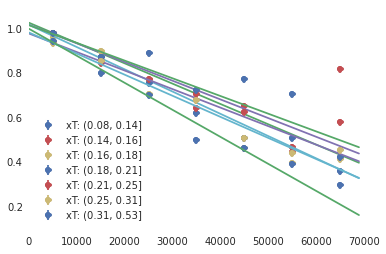

In [165]:
for kin_bin in eff.index.levels[0].values:
    popt, pcov = curve_fit(linear, intensity_centers, eff[kin_bin].values, sigma=eff_unc[kin_bin])
    print ("%s: p0 = %.4g +/- %.4g; p1 = %.4g +/- %.4g" %
           (kin_bin, popt[0], pcov[0,0]**0.5, popt[1], pcov[1,1]**0.5))
    ax = plt.errorbar(intensity_centers, eff[kin_bin].values,
                      yerr=eff_unc[kin_bin].values, fmt='o',
                      label=("%s: %s" % (eff.index.names[0], kin_bin)))
    plt.plot(x, linear(x,popt[0], popt[1]))
    #ax = eff[kin_bin].plot()
#plt.set_xticklabels(intensity_centers)
plt.legend(loc='best')